## Library Imports

In [ ]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

## Exploratory Analysis

In [ ]:
df = pd.read_csv('testingunibo.csv')
df.head()

,Voltage,Current,Temperature,WhAccu
0,2.499433,-5.001215,34.0533,0.860516
1,4.200306,0.148718,26.8295,0.000000
2,2.499817,-0.600717,28.3506,10.679774
3,4.200306,0.149368,26.0049,0.000000
4,4.162334,-0.500706,25.6872,0.005783


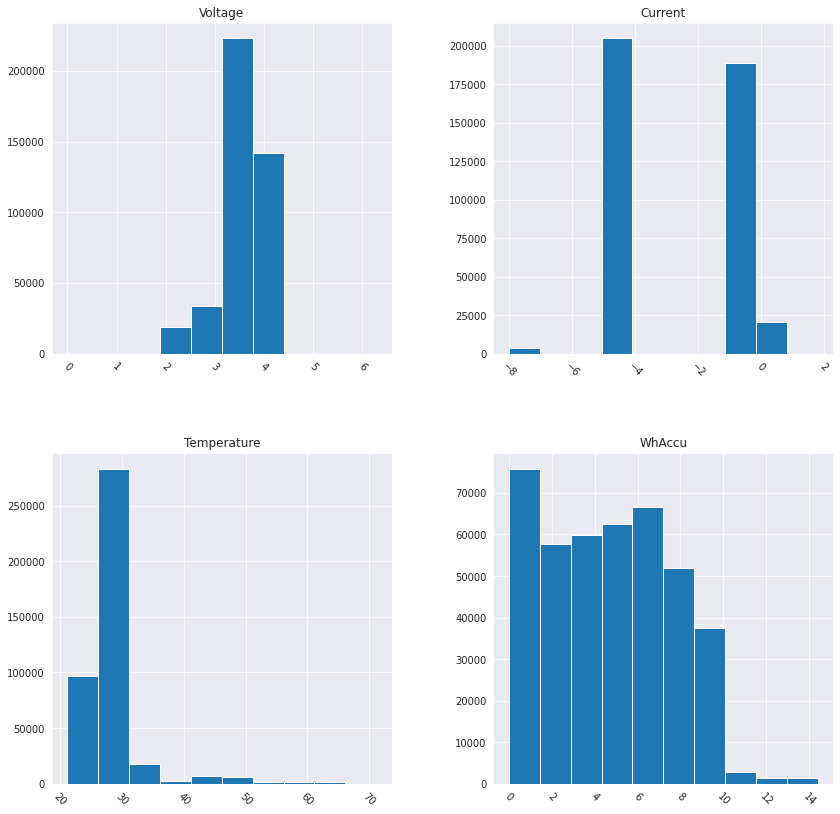

In [ ]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [ ]:
df.describe()

,Voltage,Current,Temperature,WhAccu
count,417164.000000,417164.000000,417164.000000,417164.000000
mean,3.569763,-2.742482,28.587222,4.668423
std,0.398385,2.323133,5.048606,2.949571
min,0.000192,-8.004625,21.174000,0.000000
25%,3.373635,-5.000165,26.282800,2.157451
50%,3.608168,-0.502270,27.510700,4.678542
75%,3.859310,-0.500043,29.123400,6.991750
max,6.282821,1.806616,71.143100,14.400994


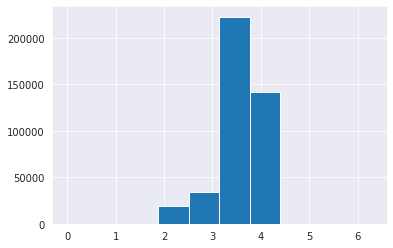

In [ ]:
df.Voltage.hist()
plt.show()

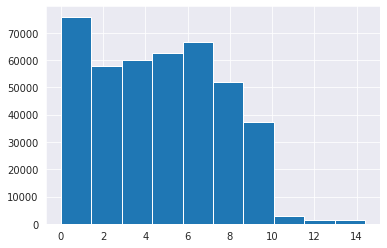

In [ ]:
df.WhAccu.hist()
plt.show()

In [ ]:
df.shape

(417164, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


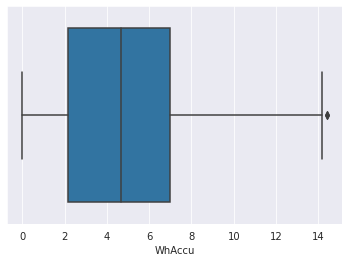

In [ ]:
sns.boxplot(df.WhAccu)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


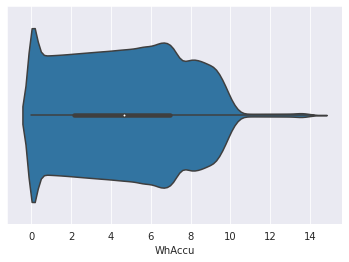

In [ ]:
sns.violinplot('WhAccu', data=df)
plt.show()

In [ ]:
correlations = df.corr()
correlations

,Voltage,Current,Temperature,WhAccu
Voltage,1.000000,0.399091,-0.605148,-0.853104
Current,0.399091,1.000000,-0.262536,-0.164876
Temperature,-0.605148,-0.262536,1.000000,0.335367
WhAccu,-0.853104,-0.164876,0.335367,1.000000


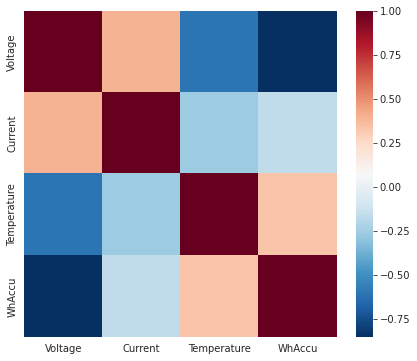

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

## Data Cleaning

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(417164, 4)
(404001, 4)


## Feature Engineering

In [ ]:
V_num = 100
V = []
V[:V_num] = df.Voltage[:V_num]
for i in range(V_num,len(df.Voltage)):
    V.append(np.mean(df.Voltage[i-V_num:i]))
df['Vmean'] = V
df.tail()

,Voltage,Current,Temperature,WhAccu,Vmean
404479,4.200151,0.097634,25.1802,0.000000,2.952593
404480,2.498921,-5.001635,47.1063,6.455960,2.961923
404481,4.200151,0.097634,26.9059,0.000000,2.956936
404482,2.498921,-5.002291,47.9281,6.493349,2.966314
404484,2.498921,-5.002291,47.1674,6.467822,2.961379


## Algorithm Selection

In [ ]:
df['Temperature'] = df['Temperature'].astype(float)

y = df.WhAccu
X = df.drop('WhAccu', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
}

In [ ]:
# Check that we have all 5 model families, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

rf <class 'sklearn.pipeline.Pipeline'>


In [ ]:
# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [10, 20],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

# decision tree hyperparameters

# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
}

In [ ]:
for key in ['rf']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

rf was found in hyperparameters, and it is a grid.


In [ ]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Store model in fitted_models[name]
    fitted_models[name] = model

    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


rf has been fitted.


In [ ]:
# pipeline = make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
# model = GridSearchCV(pipeline , hyperparameters['mlp'], cv=10, n_jobs=-1)

# # Fit model on X_train, y_train
# model.fit(X_train, y_train)

# # Print '{name} has been fitted'
# print('mlp', 'has been fitted.')

In [ ]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

rf has been fitted.


## Model Selection

In [ ]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

rf 0.9915968721317567


In [ ]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

rf
R2: 0.9921617217634723
MAE: 0.132665259641941


In [ ]:
# RF wins!

In [ ]:
from sklearn.model_selection import cross_val_score
for name,model in fitted_models.items():
  accuracies = cross_val_score(estimator = fitted_models[name], X = X_train, y = y_train, cv = 10)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 99.16 %
Standard Deviation: 0.04 %


## Insight & Analysis

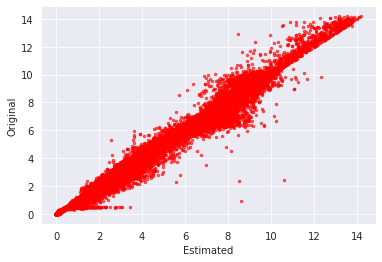

In [ ]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('Estimated')
plt.ylabel('Original')
plt.show()

In [ ]:
pr_pred = fitted_models['pr'].predict(X_test)
plt.scatter(pr_pred, y_test,color = '#ff0000',alpha=0.6,s=6)
plt.xlabel('Estimated')
plt.ylabel('Original')
plt.show()

In [ ]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
ridge_pred = fitted_models['ridge'].predict(X_test)
plt.scatter(ridge_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
lasso_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(lasso_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
enet_pred = fitted_models['enet'].predict(X_test)
plt.scatter(enet_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
fitted_models['rf'].best_estimator_

In [ ]:
with open('RF_SOC_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)